<a href="https://colab.research.google.com/github/m-bkarimi/Grokking-Deep-Learning/blob/master/chapter3_gdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=red> **Predict** </font>

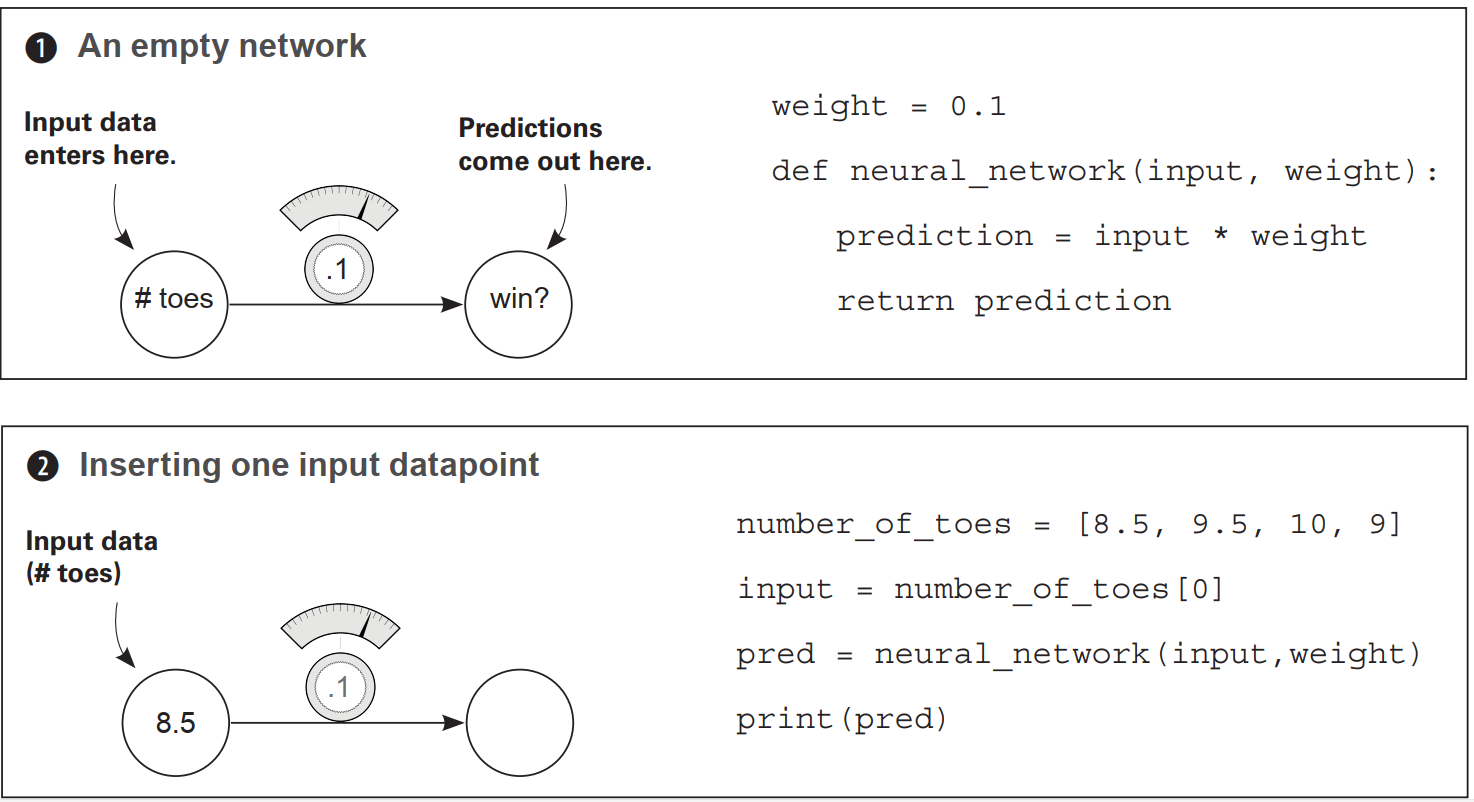

In [ ]:
weight  = 0.1
def neurol_network(input,weight):
       prediction = input*weight
       return prediction

number_of_toes = [8.5,9.5,9,10]
input = number_of_toes[0]
pred  = neurol_network(input,weight)
print(pred)


0.8500000000000001


<font color=red>**How does the network learn?**</font>

Trial and error! First, it tries to make a prediction. Then, it sees whether the prediction was too
high or too low. Finally, it changes the weight (up or down) to predict more accurately the
next time it sees the same input. *italicized text*
*italicized text*
<font color= red> `Hint` </font>
  
The interface for a neural network is simple. It accepts an input variable as information and a
weight variable as knowledge and outputs a prediction. Every neural network you’ll ever see
works this way. It uses the knowledge in the weights to interpret the information in the input
data. *italicized text*

<font color= red> `Hint` </font>

In this case, the information is the average number of toes on a baseball team before a game.
Notice several things. First, the neural network does not have access to any information
except one instance. If, after this prediction, you were to feed in number_of_toes[1], the
network wouldn’t remember the prediction it made in the last timestep. A neural network
knows only what you feed it as input. It forgets everything else. Later, you’ll learn how to
give a neural network a `“short-term memory”` by feeding in multiple inputs at once. *italicized text*

<font color= red> `Hint` </font>

Another way to think about a neural network’s weight value is as a measure of sensitivity
between the input of the network and its prediction. If the weight is very high, then even the
tiniest input can create a really large prediction! If the weight is very small, then even large
inputs will make small predictions. This sensitivity is akin to volume. “Turning up the weight”
amplifies the prediction relative to the input: weight is a volume knob!


<font color= red>**Making a prediction with multiple inputs**</font>




In [ ]:
def w_sum(a,b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output += (a[i] * b[i])
  return output

def neural_network(input, weights):
  pred = w_sum(input,weights)
  return pred

# This dataset is the current status at the beginning of
# each game for the first four games in a season:
# toes = current average number of toes per player
# wlrec = current games won (percent)
# nfans = fan count (in millions).
weights = [0.1, 0.2, 0]
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
print(pred)

0.9800000000000001


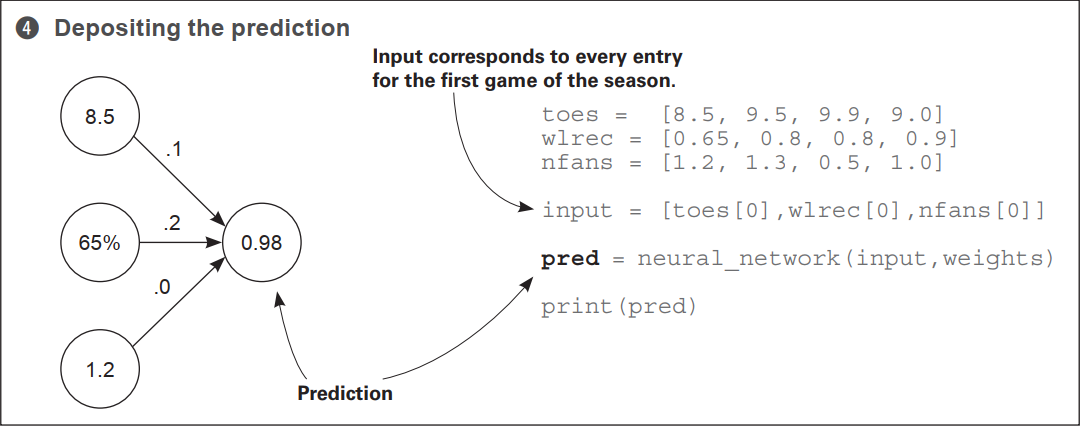

The intuition behind how and why a dot product (weighted sum) works is easily one of the most
important parts of truly understanding how neural networks make predictions. Loosely stated, a
dot product gives you a notion of <font color = red>similarity between two vectors </font>. Consider these examples:
a = [ 0, 1, 0, 1]
b = [ 1, 0, 1, 0]
c = [ 0, 1, 1, 0]
d = [.5, 0,.5, 0]
e = [ 0, 1,-1, 0]
w_sum(a,b) = 0
w_sum(b,c) = 1
w_sum(b,d) = 1
w_sum(c,c) = 2
w_sum(d,d) = .5
w_sum(c,e) = 0

crude approximate language. But I find it immensely useful when trying to picture in my
head what’s going on under the hood. This will help you significantly in the future, especially
when putting networks together in increasingly complex ways.
Given these intuitions, what does this mean when a neural network makes a prediction?
Roughly speaking, it means the network gives a high score of the inputs based on how
similar they are to the weights. Notice in the following example that nfans is completely
ignored in the prediction because the weight associated with it is 0. The most sensitive
predictor is wlrec because its weight is 0.2. But the dominant force in the high score is
the number of toes (ntoes), not because the weight is the highest, but because the input
combined with the weight is by far the highest.


In [ ]:
# NumPy code
import numpy as np
weights = np.array([0.1, 0.2, 0])
def neural_network(input, weights):
  pred = input.dot(weights)
  return pred
toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])
input = np.array([toes[0],wlrec[0],nfans[0]])
pred = neural_network(input,weights)
print(pred)

0.9800000000000001


<font color= red> **Making a prediction with multiple outputs** </font>

In [ ]:
def ele_mul(number,vector):
  output = [0,0,0]
  assert(len(output) == len(vector))
  for i in range(len(vector)):
    output[i] = number * vector[i]
  return output
def neural_network(input, weights):
  pred = ele_mul(input,weights)
  return pred
weights = [0.3, 0.2, 0.9]
wlrec = [0.65, 0.8, 0.8, 0.9]
input = wlrec[0]
pred = neural_network(input,weights)
print(pred) # return vectore ...

[0.195, 0.13, 0.5850000000000001]


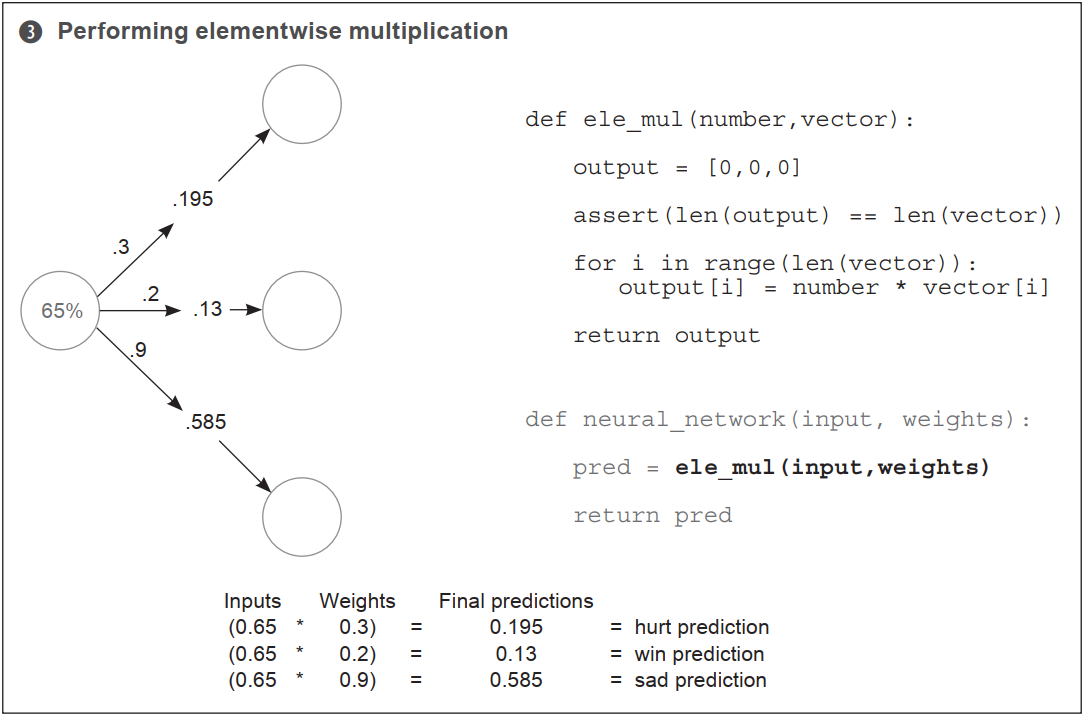

<font color= red> **Predicting with multiple inputs and outputs** </font>

In [ ]:
# toes % win # fans
weights = [ [0.1, 0.1, -0.3], # hurt?
[0.1, 0.2, 0.0], # win?
[0.0, 1.3, 0.1] ] # sad?
def neural_network(input, weights):
  pred = vect_mat_mul(input,weights)
  return pred
def w_sum(a,b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output += (a[i] * b[i])
  return output
def vect_mat_mul(vect,matrix):
  assert(len(vect) == len(matrix))
  output = [0,0,0]
  for i in range(len(vect)):
    output[i] = w_sum(vect,matrix[i])
  return output
def neural_network(input, weights):
  pred = vect_mat_mul(input,weights)
  return pred

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)

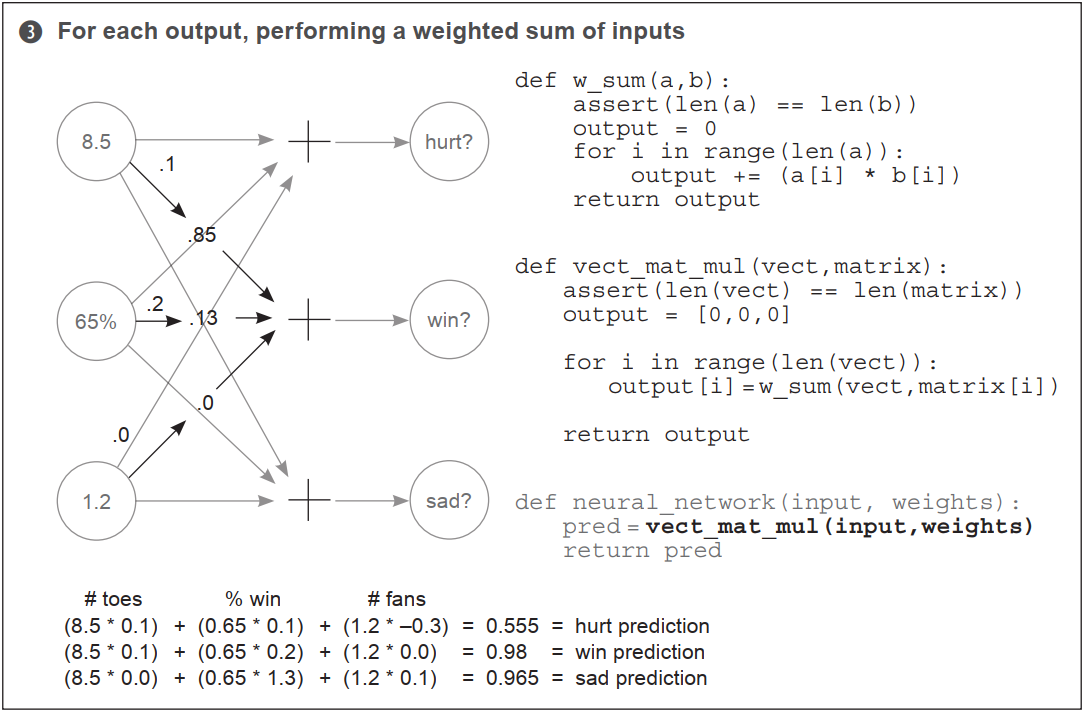

<font color=red> **Predicting on predictions** </font>

As the following figures make clear, you can also take the output of one network and feed it
as input to another network. This results in two consecutive vector-matrix multiplications.
It may not yet be clear why you’d predict this way; but some datasets (such as image
classification) contain patterns that are too complex for a single-weight matrix

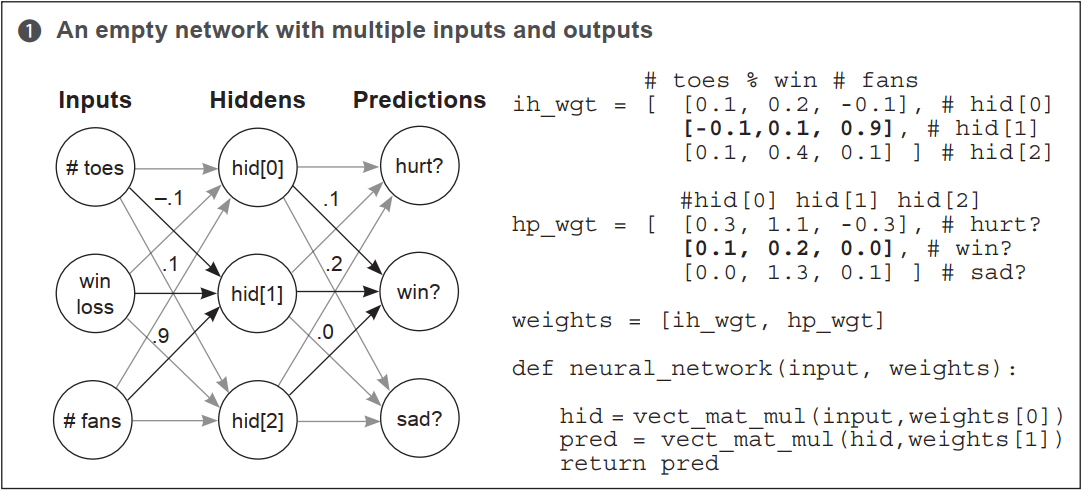

In [ ]:
# NumPy version
import numpy as np
# toes % win # fans
ih_wgt = np.array([
[0.1, 0.2, -0.1], # hid[0]
[-0.1,0.1, 0.9], # hid[1]
[0.1, 0.4, 0.1]]).T # hid[2]
# hid[0] hid[1] hid[2]
hp_wgt = np.array([
[0.3, 1.1, -0.3], # hurt?
[0.1, 0.2, 0.0], # win?
[0.0, 1.3, 0.1] ]).T # sad?
weights = [ih_wgt, hp_wgt]
def neural_network(input, weights):
  hid = input.dot(weights[0])
  print(hid)
  pred = hid.dot(weights[1])
  return pred
toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65,0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])
input = np.array([toes[0],wlrec[0],nfans[0]])
pred = neural_network(input,weights)


[0.86  0.295 1.23 ]
